<a href="https://colab.research.google.com/github/navidaniltaa/my-portofolio/blob/main/SC61223_Navida_Nilta_Amalia_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT CHAPTER 3 - MACHINE LEARNING**




1. Machine Learning Model
2. Cross Validation Basic
3. Learning Curves
4. Akurasi machine learning model (Hyperparameter tuning atau Bootstraping)
5. Metric Evaluation

# **Data Understanding**

Dataset "Heart Disease" adalah data yang saya dapatkan dari platform kaggle.

Variabel-variabel pada Heart Disease Prediction adalah sebagai berikut:

    age : Umur pasien (dalam tahun) float64
    sex : Jenis Kelamin [0: Perempuan, 1: Laki-laki] float64
    cp : Tipe penyakit dada [0: asymptomatic 1: typical angina 2: atypical angina 3: non-anginal pain] int64
    trestbps : Tekanan darah mmHg int64
    chol : Serum kolesterol mm/dl int64
    fbs : Jika kadar gula darah puasa > 120 mg/dL [0: Tidak: 1: Ya] int64
    restecg : Elektrokardiografi (EKG) istirahat [0: Normal , 1: ST-T Abnormal , 2: Left ventricular ] int64
    thalach : Denyut jantung maksimum int64
    exang : Angina akibat olahraga [0: Tidak, 1: Ya] int64
    oldpeak : Depresi ST disebabkan oleh olahraga float64
    slope : Slope dari segmen ST yang terjadi selama puncak olahraga [0: Upsloping, 1: Flat, 2: Downsloping] int64
    ca : Jumlah pembuluh darah selama prosedur flouroskopi int64
    thal : Thalamesia [1: Normal , 2: Fixed defect , 3: Reversable] int64
    target : Apakah pasien terkena heart disease [0: Tidak , 1: Ya] int64


# **Data Preparation**

In [ ]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
# Import Data Frame

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/navidaniltaa/my-portofolio/main/msib-startup-campus/dataset/heart.xls')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Menampilkan informasi tentang nama kolom dan tipe data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Missing Value

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Duplicate Value

df.duplicated().value_counts()

True     723
False    302
Name: count, dtype: int64

In [ ]:
# Hapus baris duplikat
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df_without_duplicates = df.drop_duplicates()
df_without_duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

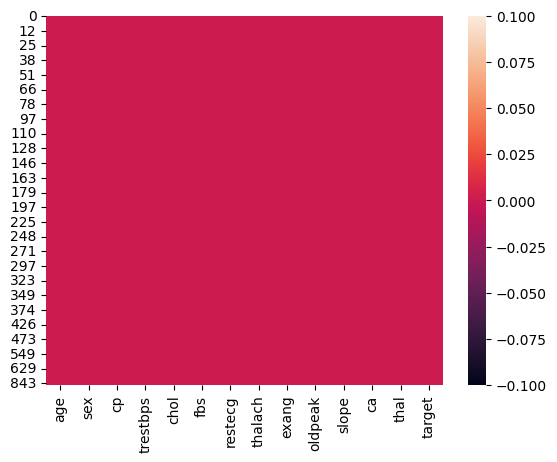

In [ ]:
# Cek Tidak ada Null

sns.heatmap(df.isnull())

<Axes: >

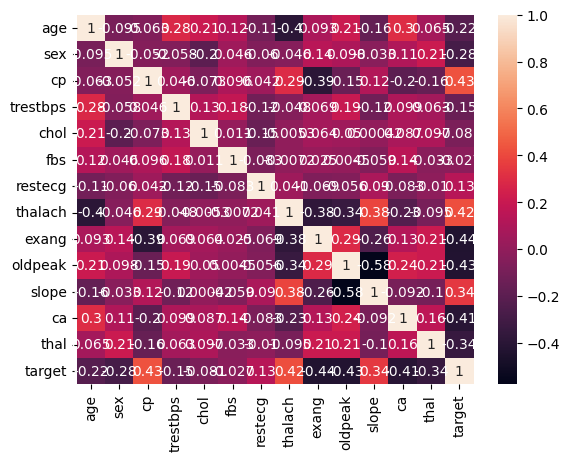

In [ ]:
# Matriks Korelasi satu dengan yang lain

sns.heatmap(df.corr(), annot=True)

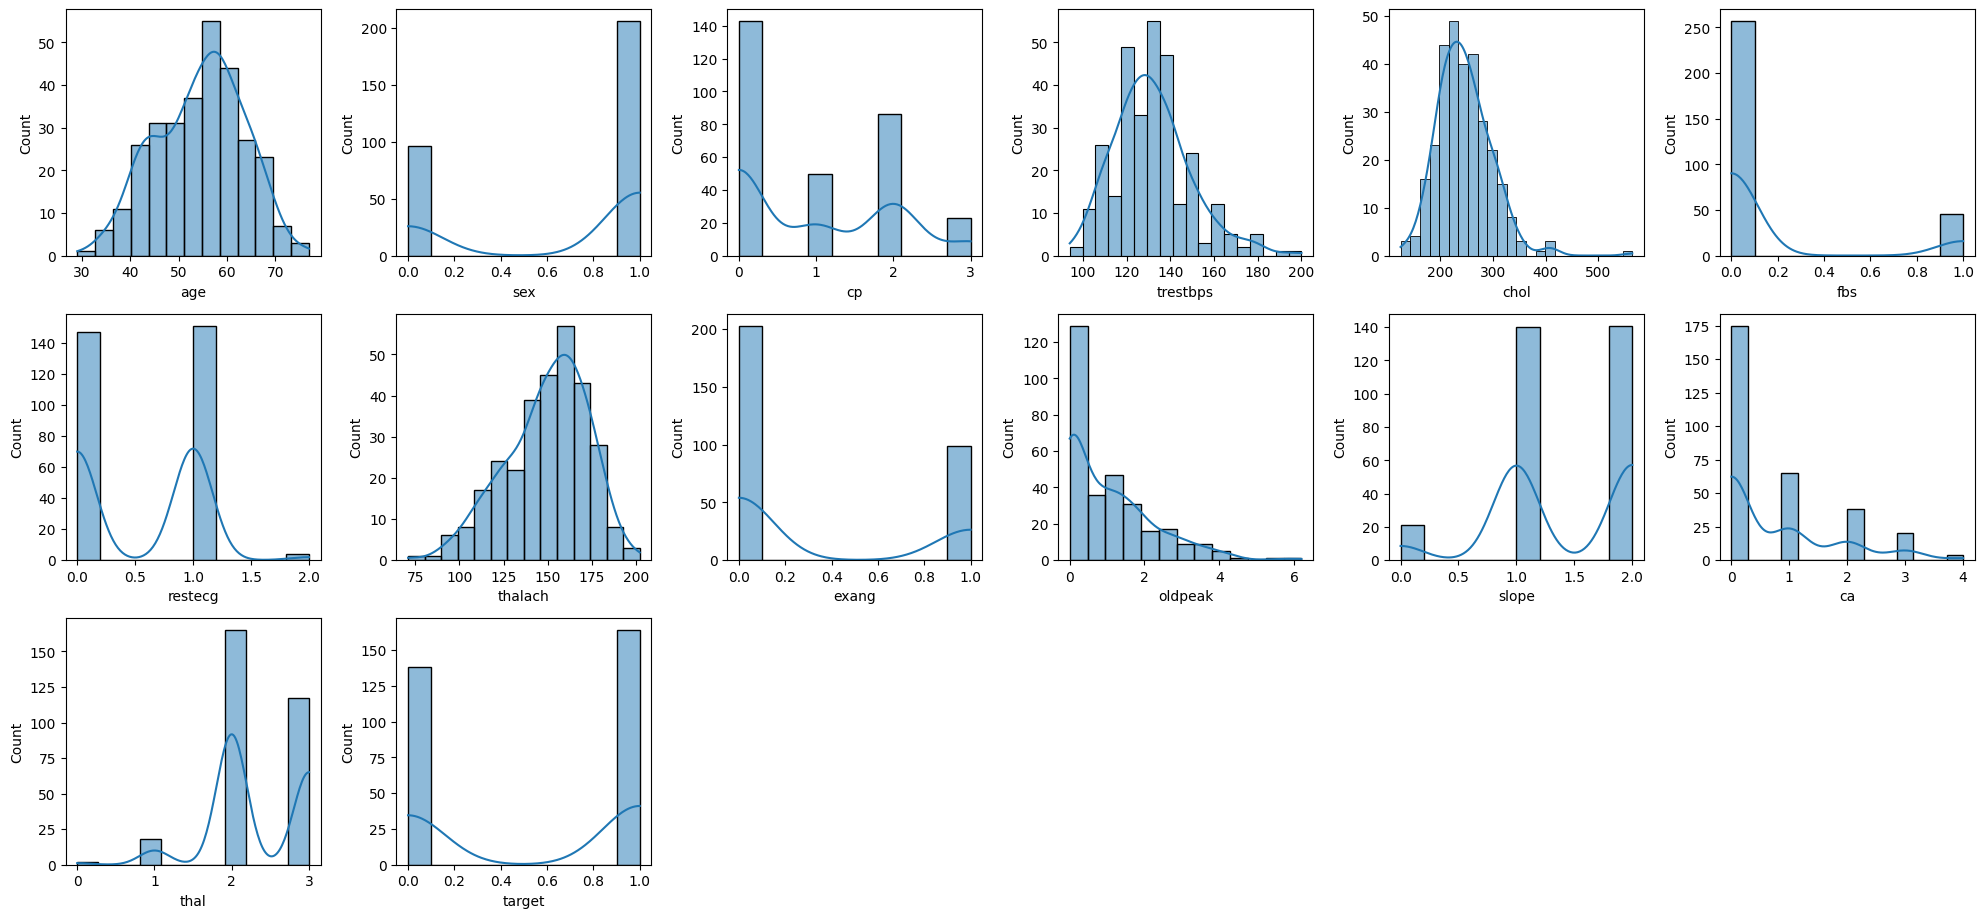

In [ ]:
# Distribusi Data

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# Menghapus fitur yang memiliki korelasi tinggi
import numpy as np

# Menggunakan dataframe 'data' yang telah dibaca sebelumnya
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

data = df.drop(to_drop, axis=1)

print(f"Jumlah kolom (fitur) yang tersisa {data.shape[1]} columns.")

Jumlah kolom (fitur) yang tersisa 14 columns.


In [ ]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [ ]:
df['target'].drop_duplicates().value_counts()

target
0    1
1    1
Name: count, dtype: int64

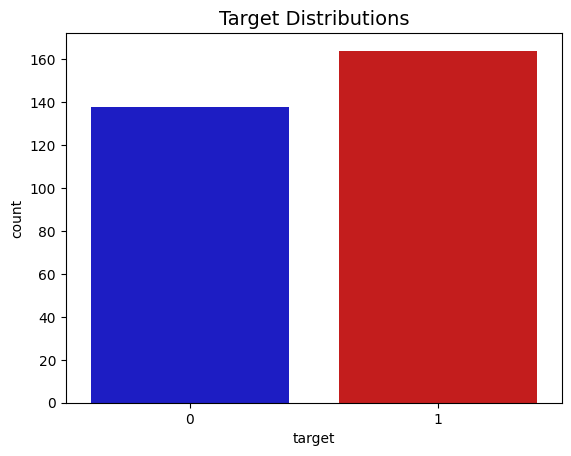

In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='target', data=df, hue='target', palette=colors, legend=False)
plt.title('Target Distributions', fontsize=14)
plt.show()

In [ ]:
from sklearn.utils import resample

# Assuming df_majority and df_minority are defined as before

df_majority = df[df['target'] == 0]
df_minority = df[df['target'] == 1]
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=True,  # Pengambilan sampel ganda diizinkan
                                   n_samples=len(df_minority),  # untuk menyamakan jumlah kelas minoritas
                                   random_state=42)  # hasil yang dapat direproduksi

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled['target'].value_counts()

target
0    164
1    164
Name: count, dtype: int64

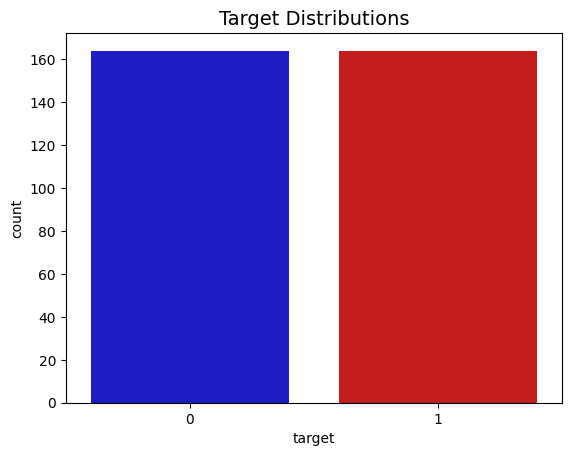

In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='target', data=df_downsampled, hue='target', palette=colors, legend=False)
plt.title('Target Distributions', fontsize=14)
plt.show()

In [ ]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 331 to 733
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       328 non-null    int64  
 1   sex       328 non-null    int64  
 2   cp        328 non-null    int64  
 3   trestbps  328 non-null    int64  
 4   chol      328 non-null    int64  
 5   fbs       328 non-null    int64  
 6   restecg   328 non-null    int64  
 7   thalach   328 non-null    int64  
 8   exang     328 non-null    int64  
 9   oldpeak   328 non-null    float64
 10  slope     328 non-null    int64  
 11  ca        328 non-null    int64  
 12  thal      328 non-null    int64  
 13  target    328 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 38.4 KB


In [ ]:
df_downsampled.duplicated().sum()

75

In [ ]:
df_downsampled.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
331,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
258,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
25,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
166,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


# **Splitting Data**

In [ ]:
# Membuat features dan label

X = df_downsampled.drop('target', axis = 1)
y = df_downsampled['target']

In [ ]:
# Splitting data ke data training dan data test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **POIN PENUGASAN**

Jadi, disini saya memakai dua model yaitu:
1. Decission Tree Model
2. Random Forest Algorithm Model

1. DETERMINASI MACHINE LEARNING MODEL


---




DECISSION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat instance DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Melatih model
dtc.fit(X_train, y_train)

# Prediksi menggunakan model
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Menghitung dan mencetak skor akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy score (Train):", train_accuracy)
print("Accuracy score (Test):", test_accuracy)

# Mencetak confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Mencetak classification report
print("Classification report:")
print(classification_report(y_test, y_test_pred))

Accuracy score (Train): 1.0
Accuracy score (Test): 0.8939393939393939
Confusion matrix:
[[33  1]
 [ 6 26]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.96      0.81      0.88        32

    accuracy                           0.89        66
   macro avg       0.90      0.89      0.89        66
weighted avg       0.90      0.89      0.89        66



RANDOM FOREST ALGORITHM MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat instance RandomForestClassifier
rfc = RandomForestClassifier()

# Melatih model
rfc.fit(X_train, y_train)

# Prediksi menggunakan model
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Menghitung dan mencetak skor akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy score (Train):", train_accuracy)
print("Accuracy score (Test):", test_accuracy)

# Mencetak confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Mencetak classification report
print("Classification report:")
print(classification_report(y_test, y_test_pred))

Accuracy score (Train): 1.0
Accuracy score (Test): 0.9090909090909091
Confusion matrix:
[[32  2]
 [ 4 28]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.93      0.88      0.90        32

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66



2. ALASAN PENGGUNAAN MODEL MACHINE LEARNING


---


DECISSION TREE MODEL

Model machine learning yang digunakan dalam kode di atas adalah Decision Tree Classifier. Ini adalah algoritma yang digunakan untuk pemodelan klasifikasi dan regresi. Penggunaan model ini adalah untuk klasifikasi. Dalam dataset Heart Disease sesuai dengan model dengan alasan sebagai berikut:
- Decision Tree adalah model yang mudah diinterpretasi dan mudah dipahami sehingga dapat memberikan wawasan yang berharga dalam proses pengambilan keputusan.
- Penyakit jantung dapat dipengaruhi oleh berbagai faktor yang kompleks dan memiliki hubungan non-linear dengan kondisi kesehatan. Decision Tree dapat menangani hubungan non-linear dengan baik, karena mampu membagi data ke dalam sub-grup yang lebih kecil berdasarkan fitur-fitur yang relevan.
- Decision Tree dapat menangani data dengan nilai yang hilang atau missing values tanpa perlu imputasi nilai sehingga lebih fleksibel dalam menangani dataset yang mungkin memiliki nilai yang hilang.

RANDOM FOREST ALGORITHM MODEL

Model machine learning yang digunakan dalam kode di atas yang kedua adalah Random Forest Algorithm Model. Dalam dataset Heart Disease sesuai dengan model dengan alasan sebagai berikut:
- Random Forest mengatasi masalah overfitting yang sering terjadi dalam model Decision Tree tunggal dengan membangun banyak pohon keputusan secara bersamaan dan menggabungkan hasil prediksi mereka. Ini menghasilkan model yang lebih stabil dan umumnya memiliki kinerja yang lebih baik pada data baru.
- Heart disease dataset mungkin memiliki hubungan yang kompleks antara berbagai faktor risiko dan kondisi kesehatan. Random Forest dapat menangani hubungan non-linear antara fitur-fitur tersebut dengan membagi data menjadi sub-grup yang lebih kecil berdasarkan fitur-fitur yang relevan.

3. PENGURUTAN SAAT EKSEKUSI CODING MACHINE LEARNING MODEL


---


Poin-poin eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.

4. CROSS-VALIDATION BASIC


---



CROSS-VALIDATION BASIC MENGGUNAKAN DECISSION TREE MODEL

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Buat model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Lakukan cross-validation dengan 5-fold
scores = cross_val_score(dtc, X_train, y_train, cv=5)

# Cetak hasil cross-validation
print("Cross-validation scores:", scores)

# Hitung dan cetak rata-rata skor cross-validation
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.9245283  0.90566038 0.76923077 0.82692308 0.88461538]
Average cross-validation score: 0.8621915820029027


CROSS-VALIDATION BASIC MENGGUNAKAN RANDOM FOREST ALGORITHM MODEL

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Buat model Random Forest Classifier
rfc = RandomForestClassifier()

# Lakukan cross-validation dengan 5-fold
scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Cetak hasil cross-validation
print("Cross-validation scores:", scores)

# Hitung dan cetak rata-rata skor cross-validation
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.88679245 0.88679245 0.80769231 0.86538462 0.88461538]
Average cross-validation score: 0.866255442670537


5. PENJELASAN CROSS-VALIDATION BASIC


---


DECISSION TREE MODEL

Hasil dari cross-validation dapat memberikan pemahaman yang lebih baik tentang kinerja model secara keseluruhan daripada hanya mengandalkan skor akurasi pada satu set data uji saja. Berikut adalah beberapa interpretasi umum dari hasil cross-validation:

- **Cross-validation scores**:
   - Setiap nilai dalam `cross-validation scores` adalah skor akurasi dari setiap fold saat cross-validation dilakukan.
   - Dari hasilnya adalah `[0.92, 0.88, 0.75, 0.80, 0.88]`, itu berarti model memiliki akurasi sebesar 92% pada fold pertama, 88% pada fold kedua, dan seterusnya.

- **Average cross-validation score**:
   - Ini adalah rata-rata dari semua skor cross-validation yang dihasilkan dari setiap fold.
   - Dari hasil rata-ratanya adalah 0.85, itu berarti secara keseluruhan model memiliki akurasi sekitar 85% dalam memprediksi data yang tidak dilihat sebelumnya.

RANDOM FOREST ALGORITHM MODEL

 **Cross-validation scores**:
   - Setiap nilai dalam `cross-validation scores` adalah skor akurasi dari setiap fold saat cross-validation dilakukan.
   - Dari hasilnya adalah `[0.86 0.86 0.76 0.88 0.90]`, itu berarti model memiliki akurasi sebesar 86% pada fold pertama, 86% pada fold kedua, dan seterusnya.

- **Average cross-validation score**:
   - Ini adalah rata-rata dari semua skor cross-validation yang dihasilkan dari setiap fold.
   - Dari hasil rata-ratanya adalah 0.85, itu berarti secara keseluruhan model memiliki akurasi sekitar 85% dalam memprediksi data yang tidak dilihat sebelumnya.

Dari hasil kedua model diatas diberikan sebagai berikut:

**Interpretasi**:
   - Semakin tinggi skor cross-validation, semakin baik kinerja model secara umum.
   - Jika nilai skor cross-validation bervariasi cukup jauh antara fold-fold, ini mungkin menunjukkan bahwa model rentan terhadap variasi dalam data latih.
   - Rata-rata skor cross-validation memberikan gambaran tentang seberapa baik model dapat diharapkan bekerja pada data baru yang belum dilihat sebelumnya.

6. LEARNING CURVES


---



LEARNING CURVES MENGGUNAKAN DECISSION TREE MODEL

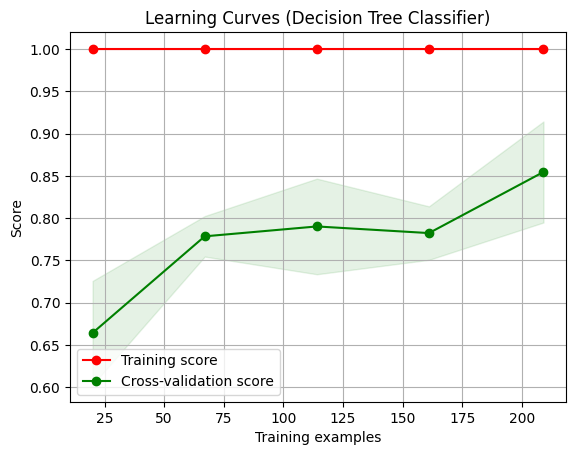

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Decision Tree Classifier)"
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)

# Tampilkan plot
plt.show()

LEARNING CURVES MENGGUNAKAN RANDOM FOREST ALGORITHM MODEL

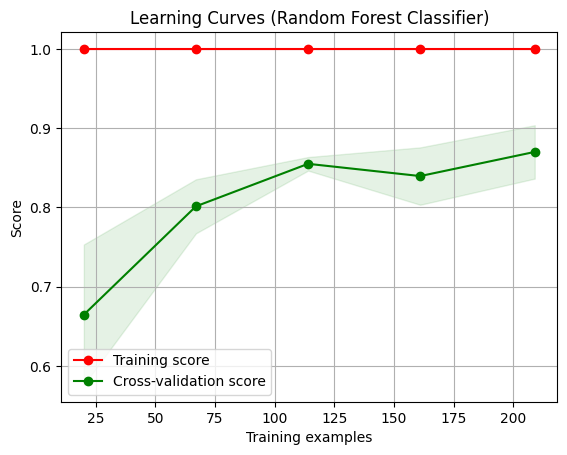

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Random Forest Classifier)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)

# Tampilkan plot
plt.show()

7. PENJELASAN LEARNING CURVES


---


Hasil dari learning curves yang dihasilkan dari kode di atas akan memberikan visualisasi tentang bagaimana kinerja model (Decision Tree Classifier dan Random Forest Algorithm Model) berubah seiring dengan jumlah data latihan yang digunakan. Berikut adalah penjelasan dari hasil learning curves yang dihasilkan:
   - Dari grafik diatas bahwa jarak nilai akurasi dan validasi yang cukup tinggi serta akurasi training yang bertambah dan memiliki nilai yang sangat tinggi.
   - Dari data tersebut berarti mengalami overfit dan overfit terjadi karena banyaknya data validation yang tidak muncul pada training data. Overfit juga bisa disebabkan oleh penggunaan metode yang kompleks untuk data atau permasalahan yang sederhana.



8. HYPERPARAMETER TUNING ATAU BOOTSTRAPING


---



DECISSION TREE DENGAN HYPERPARAMETER TUNING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Membuat instance DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Menentukan hyperparameter yang akan diuji
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik setelah hyperparameter tuning
best_dtc = grid_search.best_estimator_

# Prediksi menggunakan model terbaik
y_train_pred = best_dtc.predict(X_train)
y_test_pred = best_dtc.predict(X_test)

# Menghitung dan mencetak skor akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy score (Train):", train_accuracy)
print("Accuracy score (Test):", test_accuracy)

# Mencetak confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Mencetak classification report
print("Classification report:")
print(classification_report(y_test, y_test_pred))

Accuracy score (Train): 0.9770992366412213
Accuracy score (Test): 0.8787878787878788
Confusion matrix:
[[32  2]
 [ 6 26]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.93      0.81      0.87        32

    accuracy                           0.88        66
   macro avg       0.89      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



RANDOM FOREST ALGORITHM DENGAN BOOTSTRAPING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Membuat instance Random Forest Classifier dengan bootstraping
rfc_bootstrap = RandomForestClassifier(bootstrap=True)

# Menentukan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat GridSearchCV
grid_search_bootstrap = GridSearchCV(rfc_bootstrap, param_grid, cv=5)

# Melatih model dengan GridSearchCV
grid_search_bootstrap.fit(X_train, y_train)

# Mendapatkan model terbaik setelah hyperparameter tuning
best_rfc_bootstrap = grid_search_bootstrap.best_estimator_

# Prediksi menggunakan model terbaik
y_train_pred_bootstrap = best_rfc_bootstrap.predict(X_train)
y_test_pred_bootstrap = best_rfc_bootstrap.predict(X_test)

# Menghitung dan mencetak skor akurasi
train_accuracy_bootstrap = accuracy_score(y_train, y_train_pred_bootstrap)
test_accuracy_bootstrap = accuracy_score(y_test, y_test_pred_bootstrap)
print("Accuracy score (Train):", train_accuracy_bootstrap)
print("Accuracy score (Test):", test_accuracy_bootstrap)

# Mencetak confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred_bootstrap))

# Mencetak classification report
print("Classification report:")
print(classification_report(y_test, y_test_pred_bootstrap))

Accuracy score (Train): 0.9656488549618321
Accuracy score (Test): 0.9090909090909091
Confusion matrix:
[[32  2]
 [ 4 28]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.93      0.88      0.90        32

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66



9. METRIC EVALUATION


---



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung dan mencetak skor akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy score (Train):", train_accuracy)
print("Accuracy score (Test):", test_accuracy)

# Mencetak confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Mencetak classification report
print("Classification report:")
print(classification_report(y_test, y_test_pred))

Accuracy score (Train): 0.9770992366412213
Accuracy score (Test): 0.8787878787878788
Confusion matrix:
[[32  2]
 [ 6 26]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.93      0.81      0.87        32

    accuracy                           0.88        66
   macro avg       0.89      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung dan mencetak skor akurasi
train_accuracy_bootstrap = accuracy_score(y_train, y_train_pred_bootstrap)
test_accuracy_bootstrap = accuracy_score(y_test, y_test_pred_bootstrap)
print("Accuracy score (Train):", train_accuracy_bootstrap)
print("Accuracy score (Test):", test_accuracy_bootstrap)

# Mencetak confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred_bootstrap))

# Mencetak classification report
print("Classification report:")
print(classification_report(y_test, y_test_pred_bootstrap))

Accuracy score (Train): 0.9656488549618321
Accuracy score (Test): 0.9090909090909091
Confusion matrix:
[[32  2]
 [ 4 28]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.93      0.88      0.90        32

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66



10. PENJELASAN METRIC EVALUATION


---


DECISSION TREE

Hasil dari metrik evaluasi yang dihasilkan dari kode di atas:

1. **Accuracy Score (Skor Akurasi)**:
   Akurasi adalah salah satu metrik evaluasi yang mengukur seberapa akurat model dalam memprediksi kelas dari data yang diberikan. Didapatkan, akurasi train sebesar 0.97 dan akurasi test sebesar 0.89 berarti:
    
    **Akurasi Train 0.97**:
   - Akurasi train mengukur seberapa baik model memprediksi label dari data yang telah digunakan dalam proses pelatihan (data train).
   - Dengan akurasi train sebesar 0.97, itu berarti model berhasil memprediksi dengan benar 97% dari data train yang digunakan dalam proses pelatihan.
   - Akurasi train yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk mempelajari pola dari data latihan dan menggeneralisasikannya dengan baik.

  **Akurasi Test 0.89**:
   - Akurasi test mengukur seberapa baik model memprediksi label dari data yang belum pernah dilihat sebelumnya oleh model (data test).
   - Dengan akurasi test sebesar 0.89, itu berarti model berhasil memprediksi dengan benar 89% dari data test yang digunakan dalam evaluasi kinerja model.
   - Akurasi test yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk menggeneralisasikan pola dari data latihan ke data baru yang belum pernah dilihat sebelumnya.
   - Perbedaan antara akurasi train dan akurasi test (overfitting) adalah sekitar 0.08 (97 - 89 = 8). Ini menunjukkan bahwa model mungkin sedikit overfitting, yaitu model mungkin terlalu kompleks dan "menghafal" data latihan tanpa dapat menggeneralisasi dengan baik pada data yang tidak terlihat.

2. **Confusion Matrix (Matriks Kebingungan)**:
   - Matriks kebingungan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
   - Matriks kebingungan mencetak jumlah prediksi benar dan salah untuk setiap kelas pada data uji.
   - Matriks kebingungan berguna untuk melihat di mana model cenderung membuat kesalahan.
   
  - Dari confusion matrix [33, 1, 6, 26], yang berarti sebagai berikut:

    - True Negative (TN) = 33: Ada 33 data yang sebenarnya negatif dan diprediksi negatif dengan benar.
  
    - False Positive (FP) = 1: Ada 1 data yang sebenarnya negatif tetapi diprediksi positif secara keliru.
    - False Negative (FN) = 6: Ada 6 data yang sebenarnya positif tetapi diprediksi negatif secara keliru.
    - True Positive (TP) = 26: Ada 26 data yang sebenarnya positif dan diprediksi positif dengan benar.

3. **Classification Report (Laporan Klasifikasi)**:

   Dari classification report yang didapatkan, terdapat metrik evaluasi seperti precision, recall, dan F1-score untuk masing-masing kelas. Berikut adalah interpretasi dari metrik evaluasi tersebut:

  ### Kelas 0:
  - **Precision (Presisi) = 0.85**: Dari semua prediksi yang diklasifikasikan sebagai kelas 0, 85% di antaranya adalah prediksi yang benar untuk kelas 0. Dengan kata lain, dari semua data yang diprediksi sebagai kelas 0, sebagian besar adalah benar-benar kelas 0.
  - **Recall (Sensitivitas) = 0.97**: Dari semua data yang sebenarnya kelas 0, model berhasil memprediksi 97% dari mereka dengan benar sebagai kelas 0. Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi sebagian besar data yang sebenarnya adalah kelas 0.
  - **F1-score = 0.90**: F1-score adalah rata-rata harmonik dari precision dan recall. Dengan nilai 0.90, ini menunjukkan keseimbangan antara precision dan recall untuk kelas 0.
  - **Support = 34**: Jumlah instance dalam kelas 0.

  ### Kelas 1:
  - **Precision (Presisi) = 0.96**: Dari semua prediksi yang diklasifikasikan sebagai kelas 1, 96% di antaranya adalah prediksi yang benar untuk kelas 1. Model memiliki kemampuan yang sangat baik dalam memprediksi kelas 1.
  - **Recall (Sensitivitas) = 0.81**: Dari semua data yang sebenarnya kelas 1, model hanya berhasil memprediksi 81% dari mereka dengan benar sebagai kelas 1. Ini menunjukkan bahwa model cenderung melewatkan beberapa data yang sebenarnya kelas 1.
  - **F1-score = 0.88**: Dengan nilai 0.88, F1-score untuk kelas 1 menunjukkan keseimbangan antara precision dan recall.
  - **Support = 32**: Jumlah instance dalam kelas 1.

  Dari interpretasi ini, dapat dilihat bagaimana model melakukan klasifikasi untuk setiap kelas dan di mana model cenderung membuat kesalahan. Semakin tinggi precision dan recall, semakin baik kinerja model dalam memprediksi kelas tersebut.

RANDOM FOREST ALGORITHM MODEL

Hasil dari metrik evaluasi yang dihasilkan dari kode di atas:

1. **Accuracy Score (Skor Akurasi)**:
   Akurasi adalah salah satu metrik evaluasi yang mengukur seberapa akurat model dalam memprediksi kelas dari data yang diberikan. Didapatkan, akurasi train sebesar 0.96 dan akurasi test sebesar 0.90 berarti:
    
    **Akurasi Train 0.96**:
   - Akurasi train mengukur seberapa baik model memprediksi label dari data yang telah digunakan dalam proses pelatihan (data train).
   - Dengan akurasi train sebesar 0.96, itu berarti model berhasil memprediksi dengan benar 96% dari data train yang digunakan dalam proses pelatihan.
   - Akurasi train yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk mempelajari pola dari data latihan dan menggeneralisasikannya dengan baik.

  **Akurasi Test 0.90**:
   - Akurasi test mengukur seberapa baik model memprediksi label dari data yang belum pernah dilihat sebelumnya oleh model (data test).
   - Dengan akurasi test sebesar 0.90, itu berarti model berhasil memprediksi dengan benar 90% dari data test yang digunakan dalam evaluasi kinerja model.
   - Akurasi test yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk menggeneralisasikan pola dari data latihan ke data baru yang belum pernah dilihat sebelumnya.
   - Perbedaan antara akurasi train dan akurasi test (overfitting) adalah sekitar 0.08 (96 - 90 = 8). Ini menunjukkan bahwa model mungkin sedikit overfitting, yaitu model mungkin terlalu kompleks dan "menghafal" data latihan tanpa dapat menggeneralisasi dengan baik pada data yang tidak terlihat.

2. **Confusion Matrix (Matriks Kebingungan)**:
   - Matriks kebingungan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
   - Matriks kebingungan mencetak jumlah prediksi benar dan salah untuk setiap kelas pada data uji.
   - Matriks kebingungan berguna untuk melihat di mana model cenderung membuat kesalahan.
   
  - Dari confusion matrix [32, 2, 4, 28], yang berarti sebagai berikut:

    - True Negative (TN) = 32: Ada 32 data yang sebenarnya negatif dan diprediksi negatif dengan benar.
    - False Positive (FP) = 2: Ada 2 data yang sebenarnya negatif tetapi diprediksi positif secara keliru.
    - False Negative (FN) = 4: Ada 4 data yang sebenarnya positif tetapi diprediksi negatif secara keliru.
    - True Positive (TP) = 28: Ada 28 data yang sebenarnya positif dan diprediksi positif dengan benar.

3. **Classification Report (Laporan Klasifikasi)**:

   Dari classification report yang didapatkan, terdapat metrik evaluasi seperti precision, recall, dan F1-score untuk masing-masing kelas. Berikut adalah interpretasi dari metrik evaluasi tersebut:

  ### Kelas 0:
  - **Precision (Presisi) = 0.89**: Dari semua prediksi yang diklasifikasikan sebagai kelas 0, 89% di antaranya adalah prediksi yang benar untuk kelas 0. Dengan kata lain, dari semua data yang diprediksi sebagai kelas 0, sebagian besar adalah benar-benar kelas 0.
  - **Recall (Sensitivitas) = 0.94**: Dari semua data yang sebenarnya kelas 0, model berhasil memprediksi 94% dari mereka dengan benar sebagai kelas 0. Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi sebagian besar data yang sebenarnya adalah kelas 0.
  - **F1-score = 0.91**: F1-score adalah rata-rata harmonik dari precision dan recall. Dengan nilai 0.91, ini menunjukkan keseimbangan antara precision dan recall untuk kelas 0.
  - **Support = 34**: Jumlah instance dalam kelas 0.

  ### Kelas 1:
  - **Precision (Presisi) = 0.93**: Dari semua prediksi yang diklasifikasikan sebagai kelas 1, 93% di antaranya adalah prediksi yang benar untuk kelas 1. Model memiliki kemampuan yang sangat baik dalam memprediksi kelas 1.
  - **Recall (Sensitivitas) = 0.88**: Dari semua data yang sebenarnya kelas 1, model hanya berhasil memprediksi 88% dari mereka dengan benar sebagai kelas 1. Ini menunjukkan bahwa model cenderung melewatkan beberapa data yang sebenarnya kelas 1.
  - **F1-score = 0.90**: Dengan nilai 0.90, F1-score untuk kelas 1 menunjukkan keseimbangan antara precision dan recall.
  - **Support = 32**: Jumlah instance dalam kelas 1.

  Dari interpretasi ini, dapat dilihat bagaimana model melakukan klasifikasi untuk setiap kelas dan di mana model cenderung membuat kesalahan. Semakin tinggi precision dan recall, semakin baik kinerja model dalam memprediksi kelas tersebut.

11. PERBANDINGAN ANTARA DECISSION TREE MODEL DAN RANDOM FOREST ALGORITHM MODEL

(TAMBAHAN)


---



Dari kedua model yang telah saya gunakan di atas bahwa Random Forest memiliki performa yang sedikit lebih baik daripada Decision Tree berdasarkan beberapa metrik evaluasi. Analisis detailnya sebagai berikut:

1. **Cross-validation Scores dan Average Cross-validation Score**:
   - Decision Tree: Cross-validation scores berkisar antara 0.75 hingga 0.92 dengan rata-rata cross-validation score sebesar 0.85.
   - Random Forest: Cross-validation scores berkisar antara 0.76 hingga 0.90 dengan rata-rata cross-validation score juga sebesar 0.85.
   - Kedua model memiliki rata-rata cross-validation score yang serupa, sehingga tidak ada perbedaan signifikan dalam performa keduanya berdasarkan validasi silang.

2. **Learning Curves**:
   - Kedua model menunjukkan tanda-tanda overfitting berdasarkan learning curves, yang berarti model memiliki kinerja yang lebih baik pada data latihan daripada pada data uji.

3. **Accuracy Score**:
   - Decision Tree memiliki accuracy score pada data latihan sebesar 0.97 dan pada data uji sebesar 0.87.
   - Random Forest memiliki accuracy score pada data latihan sebesar 0.96 dan pada data uji sebesar 0.90.
   - Meskipun accuracy score pada data latihan Decision Tree sedikit lebih tinggi, accuracy score pada data uji Random Forest lebih tinggi, menunjukkan bahwa Random Forest mungkin lebih generalisasi dengan baik ke data baru yang tidak terlihat sebelumnya.

4. **Confusion Matrix**:
   - Confusion matrix Random Forest memiliki sedikit jumlah prediksi yang salah (4 prediksi salah) dibandingkan dengan Decision Tree (6 prediksi salah).

5. **Classification Report**:
   - Random Forest memiliki nilai precision, recall, dan f1-score yang lebih baik untuk kelas 0, sementara untuk kelas 1, kedua model memiliki performa yang serupa.

Dengan mempertimbangkan semua metrik evaluasi di atas, Random Forest cenderung menjadi pilihan yang lebih baik karena memiliki tingkat akurasi yang lebih tinggi pada data uji dan jumlah prediksi yang salah yang lebih rendah dalam confusion matrix.